In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import altair as alt
import japanize_matplotlib

# --- データの読み込み ---
FILE_PATH = 'output_beauty_category.csv'
try:
    df = pd.read_csv(FILE_PATH)
    # 'datetime'列を日付型に変換
    df['datetime'] = pd.to_datetime(df['datetime'])
    
    print(f"✅ '{FILE_PATH}' の読み込みに成功しました。")
    print(f"データ件数: {len(df)} 件")
    
    print("\n--- データ情報 ---")
    df.info()
    
    print("\n--- データプレビュー ---")
    display(df.head())
    
except FileNotFoundError:
    print(f"エラー: '{FILE_PATH}' が見つかりません。ファイル名とパスを確認してください。")

✅ 'output_beauty_category.csv' の読み込みに成功しました。
データ件数: 284535 件

--- データ情報 ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284535 entries, 0 to 284534
Data columns (total 4 columns):
 #   Column    Non-Null Count   Dtype         
---  ------    --------------   -----         
 0   datetime  284535 non-null  datetime64[ns]
 1   username  284535 non-null  object        
 2   likes     284535 non-null  int64         
 3   comments  284535 non-null  int64         
dtypes: datetime64[ns](1), int64(2), object(1)
memory usage: 8.7+ MB

--- データプレビュー ---


,datetime,username,likes,comments
0,2019-05-15 23:56:10,omayramontes,353,40
1,2019-05-15 22:41:42,serena_reale,32,2
2,2019-05-15 21:56:57,studionnsd,15,0
3,2019-05-15 21:29:15,smokeydabear___,178,1
4,2019-05-15 11:45:20,mirandalane_misstx,54,3


In [2]:
if 'df' in locals():
    print("--- 📊 全体サマリー ---")
    
    # 基本統計量を計算
    total_posts = len(df)
    unique_influencers = df['username'].nunique()
    start_date = df['datetime'].min().strftime('%Y-%m-%d')
    end_date = df['datetime'].max().strftime('%Y-%m-%d')
    total_likes = df['likes'].sum()
    total_comments = df['comments'].sum()

    print(f"分析対象のインフルエンサー数: {unique_influencers} 人")
    print(f"総投稿数: {total_posts:,} 件")
    print(f"データ期間: {start_date} から {end_date} まで")
    print(f"累計いいね数: {int(total_likes):,} ❤️")
    print(f"累計コメント数: {int(total_comments):,} 💬")
    print("-" * 25)
    print(f"1投稿あたりの平均いいね数: {total_likes / total_posts:.1f} ❤️")
    print(f"1投稿あたりの平均コメント数: {total_comments / total_posts:.1f} 💬")
    
    print("\n--- 数値データの統計詳細 ---")
    # .describe()で詳細な統計情報を表示
    display(df[['likes', 'comments']].describe())

--- 📊 全体サマリー ---
分析対象のインフルエンサー数: 1530 人
総投稿数: 284,535 件
データ期間: 2012-04-17 から 2019-05-15 まで
累計いいね数: 1,328,674,350 ❤️
累計コメント数: 22,352,769 💬
-------------------------
1投稿あたりの平均いいね数: 4669.6 ❤️
1投稿あたりの平均コメント数: 78.6 💬

--- 数値データの統計詳細 ---


,likes,comments
count,2.845350e+05,284535.000000
mean,4.669634e+03,78.558944
std,2.846839e+04,1781.627866
min,0.000000e+00,0.000000
25%,1.290000e+02,2.000000
50%,4.440000e+02,10.000000
75%,1.799000e+03,35.000000
max,1.930054e+06,664757.000000


--- 👤 インフルエンサー別集計 ---

--- トップ10インフルエンサー (累計いいね数順) ---


,total_posts,total_likes,total_comments,avg_likes,avg_comments
username,,,,,
bretmanrock,207,128608975,1518543,621299.4,7336.0
simoneses,200,85923902,710573,429619.5,3552.9
giovannachaves,193,41747789,298928,216309.8,1548.8
paollaoliveirareal,193,41079848,383322,212849.0,1986.1
patrickstarrr,201,32940091,237200,163881.0,1180.1
carlibel,187,30773165,164785,164562.4,881.2
ellagross,188,28201939,123512,150010.3,657.0
sadaf_beauty,206,21992689,2381010,106760.6,11558.3
nicoleguerriero,204,17860466,568954,87551.3,2789.0


/tmp/ipykernel_2593711/399736155.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_20_by_avg_likes['avg_likes'], y=top_20_by_avg_likes.index, palette='viridis')


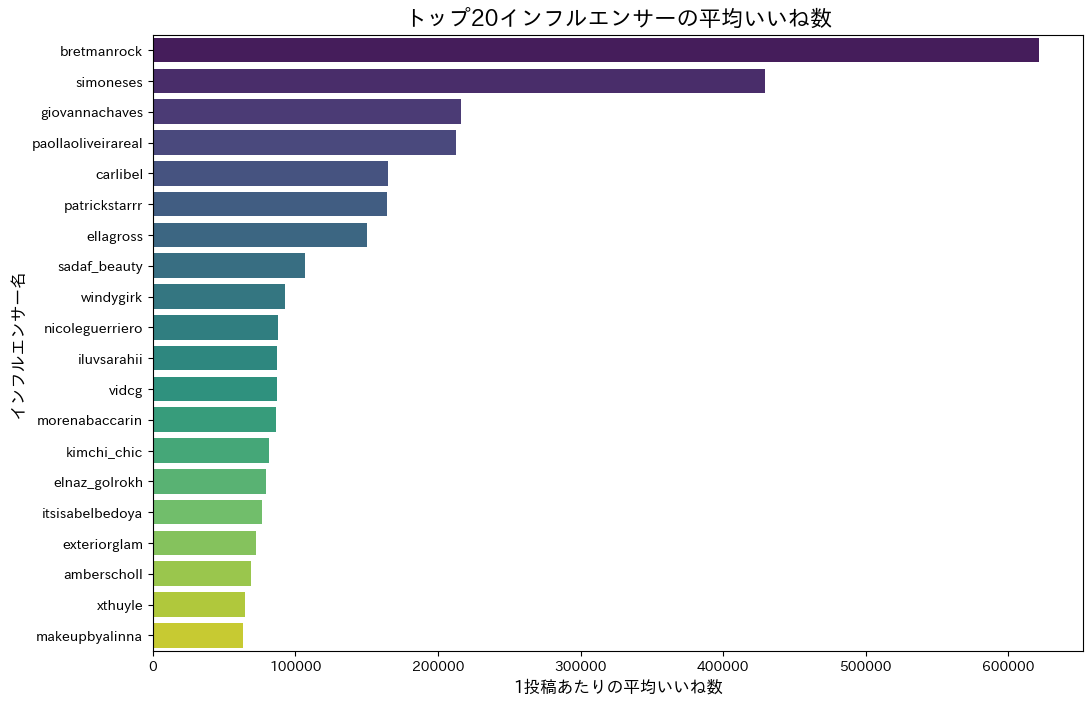

In [3]:
if 'df' in locals():
    print("--- 👤 インフルエンサー別集計 ---")
    
    # インフルエンサーごとに集計
    influencer_summary = df.groupby('username').agg(
        total_posts=('username', 'size'),
        total_likes=('likes', 'sum'),
        total_comments=('comments', 'sum'),
        avg_likes=('likes', 'mean'),
        avg_comments=('comments', 'mean')
    ).round(1).sort_values('total_likes', ascending=False)
    
    print("\n--- トップ10インフルエンサー (累計いいね数順) ---")
    display(influencer_summary.head(10))

    # グラフ描画 (トップ20インフルエンサーの投稿あたりの平均いいね数)
    top_20_by_avg_likes = influencer_summary.sort_values('avg_likes', ascending=False).head(20)
    
    plt.figure(figsize=(12, 8))
    sns.barplot(x=top_20_by_avg_likes['avg_likes'], y=top_20_by_avg_likes.index, palette='viridis')
    plt.title('トップ20インフルエンサーの平均いいね数', fontsize=16)
    plt.xlabel('1投稿あたりの平均いいね数', fontsize=12)
    plt.ylabel('インフルエンサー名', fontsize=12)
    plt.show()

--- 📈 時系列分析 ---


/tmp/ipykernel_2593711/3619670033.py:6: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_posts = df_ts.resample('M').size()


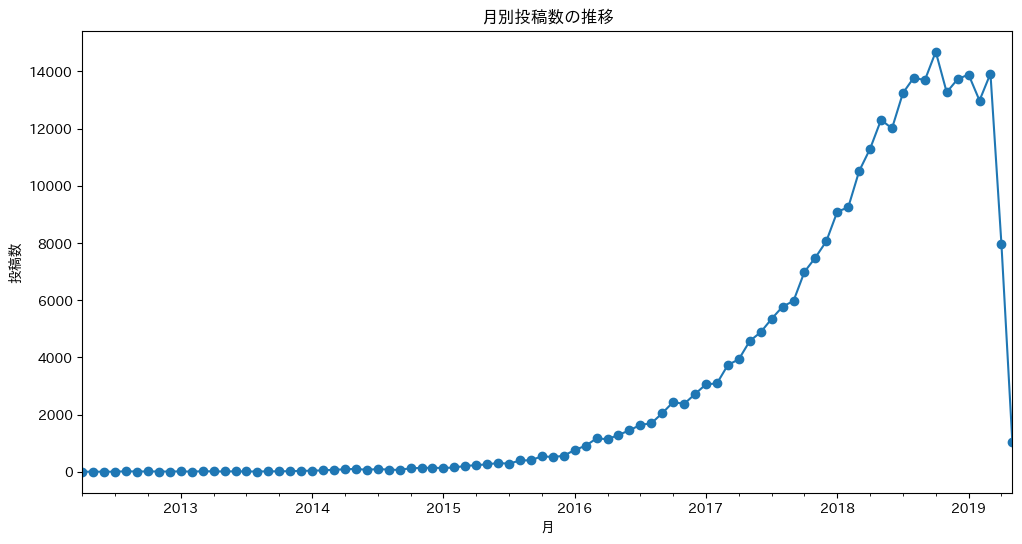

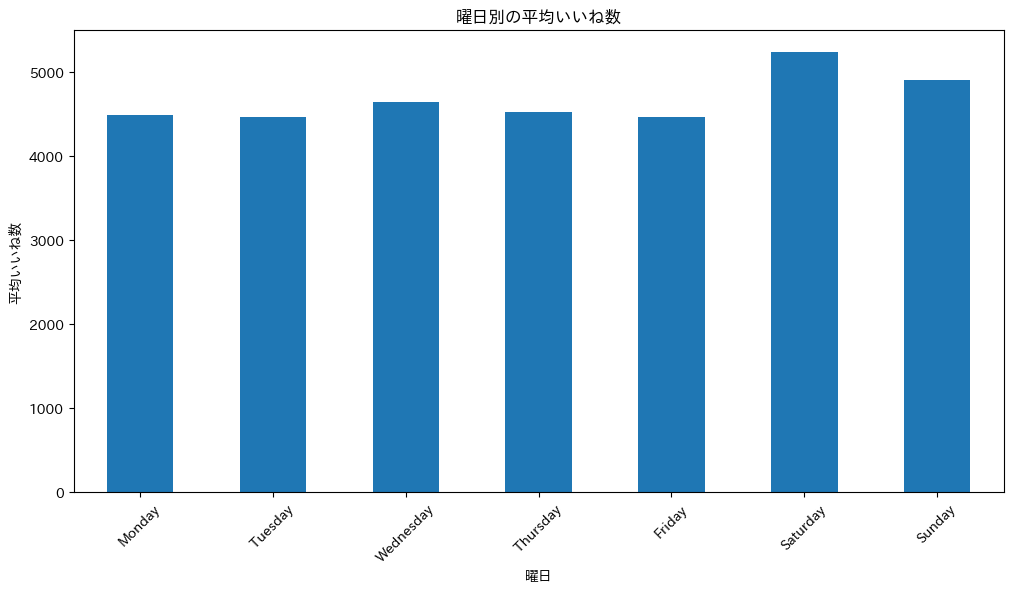

In [4]:
if 'df' in locals():
    print("--- 📈 時系列分析 ---")
    df_ts = df.set_index('datetime')
    
    # 月別の投稿数の推移
    monthly_posts = df_ts.resample('M').size()
    plt.figure(figsize=(12, 6))
    monthly_posts.plot(kind='line', marker='o', title='月別投稿数の推移')
    plt.ylabel('投稿数')
    plt.xlabel('月')
    plt.show()

    # 曜日別の平均いいね数
    df['day_of_week'] = df['datetime'].dt.day_name()
    weekday_order = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
    avg_likes_by_day = df.groupby('day_of_week')['likes'].mean().reindex(weekday_order)
    
    plt.figure(figsize=(12, 6))
    avg_likes_by_day.plot(kind='bar', title='曜日別の平均いいね数')
    plt.ylabel('平均いいね数')
    plt.xlabel('曜日')
    plt.xticks(rotation=45)
    plt.show()

--- 💞 いいね数とコメント数の相関分析 ---


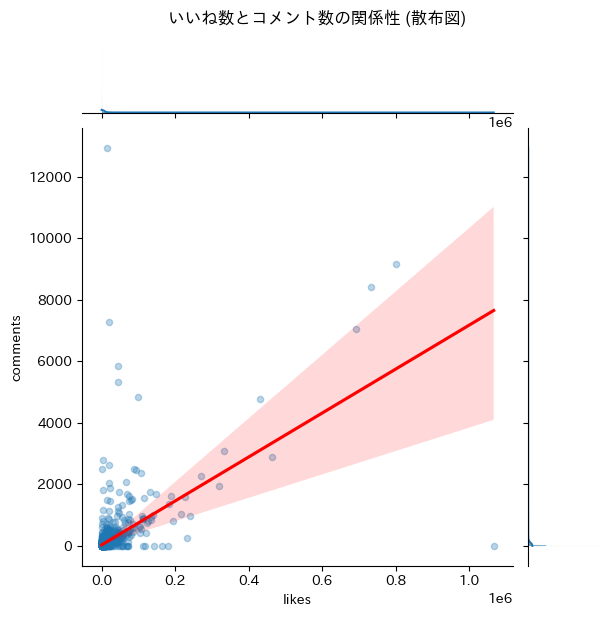


--- 相関係数行列 ---
1に近いほど強い正の相関があります。


,likes,comments
likes,1.000000,0.219377
comments,0.219377,1.000000


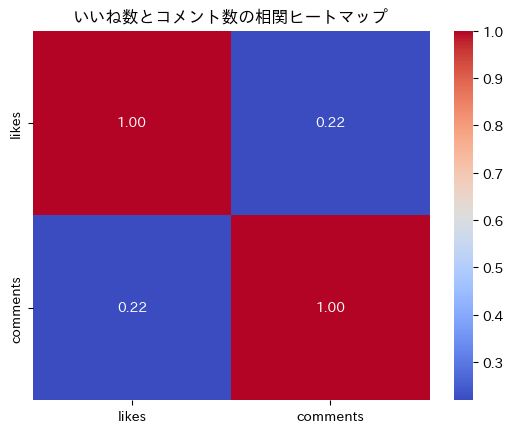

In [5]:
if 'df' in locals():
    print("--- 💞 いいね数とコメント数の相関分析 ---")

    # サンプル数が多すぎると描画が重くなるため、5000件をランダムにサンプリングして使用
    sample_df = df.sample(n=min(5000, len(df)), random_state=42)
    
    # 散布図で関係性を可視化
    sns.jointplot(x='likes', y='comments', data=sample_df, kind='reg', # 'reg'は回帰直線を描画
                  joint_kws={'scatter_kws': {'alpha': 0.3, 's': 20}},
                  line_kws={'color': 'red'})
    plt.suptitle('いいね数とコメント数の関係性 (散布図)', y=1.02)
    plt.show()

    # 相関係数を計算
    correlation = df[['likes', 'comments']].corr()
    print("\n--- 相関係数行列 ---")
    print("1に近いほど強い正の相関があります。")
    display(correlation)

    # ヒートマップで可視化
    sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt='.2f')
    plt.title('いいね数とコメント数の相関ヒートマップ')
    plt.show()